In [1]:
import pandas as pd

close = pd.DataFrame(
    {
        'ABC': [1, 5, 3, 6, 2],
        'EFG': [12, 51, 43, 56, 22],
        'XYZ': [35, 36, 36, 36, 37],},
    pd.date_range('10/01/2018', periods=5, freq='D'))
close

,ABC,EFG,XYZ
2018-10-01,1,12,35
2018-10-02,5,51,36
2018-10-03,3,43,36
2018-10-04,6,56,36
2018-10-05,2,22,37


In [2]:
close.shift(2)

,ABC,EFG,XYZ
2018-10-01,NaN,NaN,NaN
2018-10-02,NaN,NaN,NaN
2018-10-03,1.0,12.0,35.0
2018-10-04,5.0,51.0,36.0
2018-10-05,3.0,43.0,36.0


In [3]:
close.shift(-1)

,ABC,EFG,XYZ
2018-10-01,5.0,51.0,36.0
2018-10-02,3.0,43.0,36.0
2018-10-03,6.0,56.0,36.0
2018-10-04,2.0,22.0,37.0
2018-10-05,NaN,NaN,NaN


In [4]:
def calculate_returns(close):
    """
    Compute returns for each ticker and date in close.
    
    Parameters
    ----------
    close : DataFrame
        Close prices for each ticker and date
    
    Returns
    -------
    returns : DataFrame
        Returns for each ticker and date
    """
    # TODO: Implement Function
    returns = (close-close.shift(1))/close.shift(1)
    return returns

calculate_returns(close)

,ABC,EFG,XYZ
2018-10-01,NaN,NaN,NaN
2018-10-02,4.000000,3.250000,0.028571
2018-10-03,-0.400000,-0.156863,0.000000
2018-10-04,1.000000,0.302326,0.000000
2018-10-05,-0.666667,-0.607143,0.027778


In [5]:
from scipy.stats import bernoulli
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

Let's say you invested $100 in a stock with a mean monthly return of 1%. But there is dispersion around the mean: the actual returns of the stock each month are 1% + 2% = 3% or 1% - 2% = -1%, with equal probability. By simulating many possible ways this scenario could play out over time, let's look at the distribution of ending values of the portfolio over several time horizons.

We'll model these returns using a Bernoulli random variable, which we can simulate in code using scipy.stats.bernoulli. A Bernoulli random variable takes the values 1 or 0 with a probability set by a parameter p.

In [6]:
def generate_returns(num_returns):
    p = 0.5
    return 0.01 + (bernoulli.rvs(p, size=num_returns)-0.5)*0.04
print(generate_returns(6))

[ 0.03 -0.01 -0.01 -0.01  0.03  0.03]


First, let's look at the distribution of ending values of the stock over 6 months.

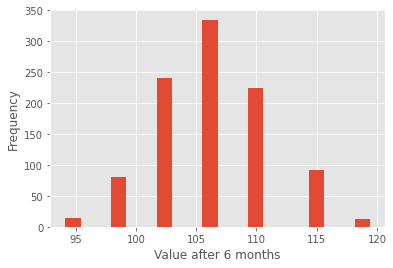

In [7]:
final_values = [100*np.prod(generate_returns(6)+1) for i in range(1,1000)]
plt.hist(final_values, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Value after 6 months')
plt.show()

After 6 months, the distribution of possible values looks symmetric and bell-shaped. This is because there are more paths that lead to middle-valued ending prices. Now, let's look at the ending values of the stock over 20 months.

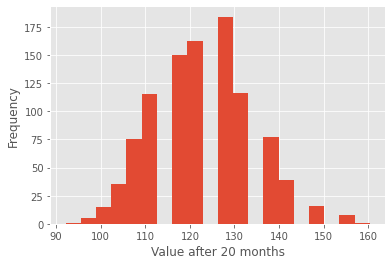

In [8]:
final_values = [100*np.prod(generate_returns(20)+1) for i in range(1,1000)]
plt.hist(final_values, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Value after 20 months')
plt.show()

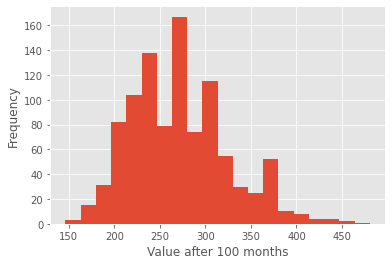

In [9]:
final_values = [100*np.prod(generate_returns(100)+1) for i in range(1,1000)]
plt.hist(final_values, bins=20)
plt.ylabel('Frequency')
plt.xlabel('Value after 100 months')
plt.show()

As you can see, the distribution gets less and less normal-looking over time. The upside potential is unlimited—there always exists the possibility that the stock will continue to appreciate over time. The downside potential, however, is limited to zero—you cannot loose more than 100% of your investment. The distribution we see emerging here is distinctly asymmetric—the values are always positive, but there is a long tail on the right-hand side: we say, it is positively skewed. The distribution is approaching what's called a lognormal distribution. Let's talk more about how this distribution emerges in the next video.

<h1>trading signals and filling positions</h1>

In [11]:
prices = np.array([1, 3, -2, 9, 5, 7, 2])

prices

array([ 1,  3, -2,  9,  5,  7,  2])

In [12]:
signal_one = prices > 2
signal_three = prices > 4

print(signal_one)
print(signal_three)

[False  True False  True  True  True False]
[False False False  True  True  True False]


If Signal is above given value of the signal, we want to invest. So we need to convert false true back into integers 

In [13]:
signal_one = signal_one.astype(np.int)
signal_three = signal_three.astype(np.int)

print(signal_one)
print(signal_three)

[0 1 0 1 1 1 0]
[0 0 0 1 1 1 0]


In [14]:
#invest through multiplication
pos_one = 1 * signal_one
pos_three = 3 * signal_three

print(pos_one)
print(pos_three)

[0 1 0 1 1 1 0]
[0 0 0 3 3 3 0]


In [15]:
long_pos = pos_one + pos_three

print(long_pos)

[0 1 0 4 4 4 0]


In [16]:

def generate_positions(prices):
    """
    Generate the following signals:
     - Long 30 share of stock when the price is above 50 dollars
     - Short 10 shares when it's below 20 dollars
    
    Parameters
    ----------
    prices : DataFrame
        Prices for each ticker and date
    
    Returns
    -------
    final_positions : DataFrame
        Final positions for each ticker and date
    """
    # TODO: Implement Function
    signal_long = prices > 50
    signal_short = prices < 20
    
    #prep signals for investment through multiplication
    signal_one = signal_long.astype(np.int)
    signal_three = signal_short.astype(np.int)
    
    #invest
    buy_pos = 30 * signal_one
    short_pos = -10 * signal_three
    return buy_pos + short_pos